In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install transformers

     |████████████████████████████████| 2.5MB 5.1MB/s 
     |████████████████████████████████| 901kB 26.5MB/s 
     |████████████████████████████████| 3.3MB 37.7MB/s 


In [3]:
# install the full version
!pip install pycaret[full]

     |████████████████████████████████| 266kB 6.6MB/s 
     |████████████████████████████████| 2.0MB 9.4MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 6.8MB 23.2MB/s 
     |████████████████████████████████| 256kB 39.5MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 14.2MB 37.2MB/s 
     |████████████████████████████████| 276kB 33.8MB/s 
     |████████████████████████████████| 1.4MB 44.9MB/s 
     |████████████████████████████████| 112kB 47.2MB/s 
     |████████████████████████████████| 174kB 43.8MB/s 
     |████████████████████████████████| 1.7MB 30.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 348kB 39.0MB/s 
     |████████████████████████████████| 307kB 31.7MB/s 
     |████████████████████████████████| 49.4MB 106kB

In [4]:
!pip install pytorch_pretrained_bert pytorch-nlp

     |████████████████████████████████| 133kB 5.2MB/s 
     |████████████████████████████████| 92kB 5.2MB/s 
     |████████████████████████████████| 133kB 8.4MB/s 


In [5]:
import re
import sys
import itertools
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import torch
from pytorch_pretrained_bert import BertModel
from torch import nn
from torchnlp.datasets import imdb_dataset
from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output

In [6]:
rn.seed(321)
np.random.seed(321)
torch.manual_seed(321)
torch.cuda.manual_seed(321)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [7]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 5.2MB/s 


In [8]:
from transformers import *

class GlobalBERT:
    def __init__(self):
        self.model_class, self.tokenizer_class, self.pretrained_weights = (BertModel, BertTokenizer, 'bert-large-cased')

        self.tokenizer = self.tokenizer_class.from_pretrained(self.pretrained_weights)
        self.model = self.model_class.from_pretrained(self.pretrained_weights, output_hidden_states=True)

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        raise Exception

class BERT11Sense(GlobalBERT):
    def __init__(self):
        super().__init__()

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        input_ids = torch.tensor([self.tokenizer.encode(text,
                                                   add_special_tokens=use_special_tokens)])
        outputs = self.model(input_ids)[2]
        return (outputs[12][0]).detach().numpy()
       
       
bb = BERT11Sense()


bb.from_sentence_to_embedding("hello darling")

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


array([[ 0.5389201 ,  1.0641235 ,  0.06854255, ...,  0.49491492,
        -0.45627216,  0.919665  ],
       [ 0.19274744, -1.5048002 , -0.0399613 , ...,  0.22078943,
        -0.87698835,  0.87579757],
       [-0.86593825, -1.0224621 , -0.8534433 , ...,  0.34580904,
        -0.14207198,  0.37167034],
       [ 0.09797835, -0.00276921,  0.04643986, ...,  0.36611316,
        -0.05931369, -0.04601841]], dtype=float32)

In [9]:
cd drive/My Drive/Colab Notebooks/experiments

/content/drive/My Drive/Colab Notebooks/experiments


In [10]:
import pandas as pd
df = pd.read_csv('data/trofi.csv')

In [11]:
df.head(3)

verb                                           sentence  verb_idx  label
0  absorb  An Energy Department spokesman says the sulfur...        22      0
1  absorb  The yellow beta carotene pigment absorbs blue ...         5      0
2  absorb  This time , the ground absorbed the shock wave...         5      0

In [12]:
#embeddings = [np.mean(bb.from_sentence_to_embedding(k), axis = 0) for k in df["sentence"].values]

In [13]:
#embeddings = np.array(embeddings)
#embeddings.shape

In [14]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [15]:
from sklearn.model_selection import train_test_split

X = df.sentence.values
y = df.label.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020)

In [16]:
# Load test data - TroFi
import pandas as pd
# Use a subset for quick experiments
#data = data[:10000]

from sklearn.model_selection import train_test_split as tts
import pandas as pd
data = pd.read_csv("data/trofi.csv")

# Split to train, val and test
train, test_data = tts(data[["sentence", "label"]], random_state=42, test_size=0.1)
train, val = tts(train, random_state=42, test_size=test_data.shape[0])

In [17]:
import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
X_train

array(['And expense - account fliers , who learned long ago to construct elaborate flight schemes to earn extra mileage , now are battling to pick up dinner tabs to grab mileage linked to charge - card purchases ',
       'The feisty , 62-year - old director of the airline division of the Teamsters union wants 4 , 300 Pan Am reservationists , ticket agents , and office and other workers to strike Pan Am Corp. after a cooling - off period that ends Sunday ',
       'John Gil , a San Diego landlord , and Mike Black , an apartment manager , were sued in state Superior Court in San Diego by a tenant who was assaulted by a pet monkey owned by two other renters ',
       ..., 'German companies are sticking with what they have ',
       "'' He just tried to eat the propeller , '' says Mr. Fox ",
       "Last Tuesday , a federal jury in Akron , Ohio said it could n't identify a defect that could have caused an Audi 5000 to suddenly accelerate in an accident that killed a six - year - old boy "

In [19]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [20]:
X_val

array(['Ever since , Banner has been besieged by hundreds of thrill - seeking callers ',
       'We groaned on cue as he rolled over , stood the airplane on its tail and hurtled straight up to a stall at 6 , 000 feet , white smoke trailing from smoke generators at his wingtips ',
       'In northern Nicaragua , Honduran jets attacked a Sandinista military headquarters ',
       "Lung congestion is a result of weakened or impaired pumping action by the heart 's key lower left chamber ",
       'When we first encounter Nina , she is blaming her kindly old Dad for succumbing to fatherly jealousy and blocking her marriage to a handsome flying ace named Gordon , who is subsequently killed in World War I ',
       'After making several major acquisitions , including American Motors Corp . , in 1986 and 1987 , Chrysler has spent this year trying to integrate those operations with its existing ones , and stepping up spending on technology to develop new products ',
       'So far , no one is g

In [21]:
y_val

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [22]:
#TF-IDF vectorizer - vectorize text data beforecreating the model

%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

CPU times: user 12.5 s, sys: 1.57 s, total: 14.1 s
Wall time: 14 s


In [23]:
# Hyperparameter Tuning

from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.2000000000000002 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.3000000000000003 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.40000000000

Best alpha:  2.5


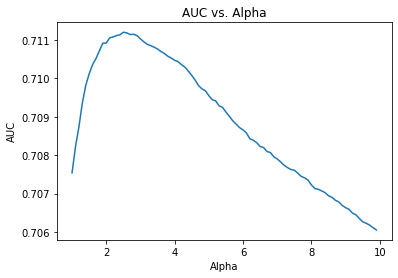

In [24]:
# MultinomialNB - find the best alpha parameter that gives the highest CV AUC score

from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [25]:
# Evaluation on validation set - model'saccuracy rate and AUC score on validation set

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision*100:.2f}%')
    print(f'Recall: {recall*100:.2f}%')
    print(f'F1: {f1*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.6411
Accuracy: 57.75%
Precision: 80.00%
Recall: 9.41%
F1: 16.84%


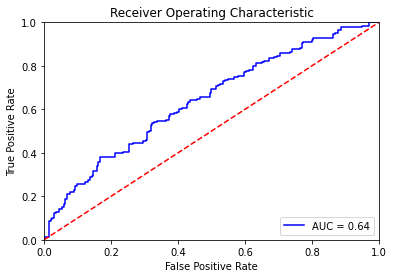

In [26]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_val)

# This is the baseline accuracy score before finetuning

## PyCaret All Models

In [27]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3737, 4)
Unseen Data For Predictions: (187, 4)


In [28]:
stop_words = stopwords.words('english')

In [29]:
from pycaret.nlp import *

In [30]:
%time su_1 = setup(data = df, target = 'label', custom_stopwords=stop_words, session_id=21)

CPU times: user 3.44 s, sys: 530 ms, total: 3.97 s
Wall time: 6.88 s


In [31]:
from pycaret.classification import *

In [ ]:
%time pce_1 = setup(data = df, target = 'label', session_id = 5, train_size = 0.7)

In [ ]:
%time compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.7211  0.7580  0.5382  0.7449   
ridge                    Ridge Classifier    0.7163  0.0000  0.5720  0.7154   
lr                    Logistic Regression    0.7157  0.7789  0.5610  0.7196   
ada                  Ada Boost Classifier    0.7157  0.7708  0.5272  0.7396   
rf               Random Forest Classifier    0.7139  0.7596  0.5072  0.7492   
catboost              CatBoost Classifier    0.7098  0.7702  0.5100  0.7370   
gbc          Gradient Boosting Classifier    0.7065  0.7701  0.4824  0.7480   
lightgbm  Light Gradient Boosting Machine    0.6991  0.7559  0.5906  0.6731   
dt               Decision Tree Classifier    0.6973  0.6854  0.5989  0.6670   
knn                K Neighbors Classifier    0.6581  0.6916  0.5362  0.6200   
svm                   SVM - Linear Kernel    0.6197  0.0000  0.4647  0.7016   
nb                            Naive Bayes    0.4642  0.5277  0.9910  0.4456   
qda       Quadratic Discriminant Analysis    0.4548  0.0000  0.0000  0.0000   
lda          Linear Discriminant Analysis    0.1670  0.1639  0.1400  0.1478   

              F1   Kappa     MCC  TT (Sec)  
et        0.6242  0.4117  0.4258     3.943  
ridge     0.6347  0.4076  0.4152     0.508  
lr        0.6297  0.4048  0.4136     3.198  
ada       0.6154  0.3998  0.4144     1.295  
rf        0.6043  0.3933  0.4119     2.432  
catboost  0.6021  0.3856  0.4022     7.731  
gbc       0.5861  0.3750  0.3968     4.147  
lightgbm  0.6287  0.3776  0.3802     0.504  
dt        0.6307  0.3755  0.3774     0.354  
knn       0.5747  0.2914  0.2937     1.184  
svm       0.4498  0.2063  0.2748     0.841  
nb        0.6148  0.0483  0.1406     0.138  
qda       0.0000  0.0000  0.0000     4.492  
lda       0.1434  0.0279  0.0282    13.664

CPU times: user 24.1 s, sys: 2.37 s, total: 26.5 s
Wall time: 11min 20s


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5, verbose=0,
                     warm_start=False)

### Naive Bayes

In [ ]:
nb = create_model('nb')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4659  0.5264  0.9795  0.4469  0.6137  0.0463  0.1194
1       0.4570  0.5234  1.0000  0.4421  0.6131  0.0406  0.1440
2       0.4540  0.5208  1.0000  0.4407  0.6118  0.0361  0.1355
3       0.4554  0.5201  0.9931  0.4417  0.6115  0.0350  0.1172
4       0.4673  0.5281  0.9724  0.4462  0.6117  0.0492  0.1176
5       0.4643  0.5280  0.9931  0.4458  0.6154  0.0487  0.1436
6       0.4583  0.5227  0.9931  0.4431  0.6128  0.0395  0.1265
7       0.4732  0.5358  0.9931  0.4500  0.6194  0.0625  0.1666
8       0.4732  0.5350  0.9862  0.4497  0.6177  0.0612  0.1539
9       0.4732  0.5366  1.0000  0.4503  0.6210  0.0639  0.1817
Mean    0.4642  0.5277  0.9910  0.4456  0.6148  0.0483  0.1406
SD      0.0072  0.0059  0.0087  0.0034  0.0032  0.0104  0.0208

In [ ]:
#step2 : model tuning
%time tuned_nb = tune_model(nb)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5994  0.7612  0.1027  0.7895  0.1818  0.0911  0.1757
1       0.6024  0.7581  0.0966  0.8235  0.1728  0.0907  0.1831
2       0.6083  0.7330  0.0966  0.9333  0.1750  0.1026  0.2193
3       0.5863  0.7608  0.0759  0.6875  0.1366  0.0556  0.1156
4       0.5982  0.7979  0.0897  0.8125  0.1615  0.0828  0.1720
5       0.6131  0.7304  0.1103  0.9412  0.1975  0.1176  0.2375
6       0.6042  0.7619  0.1379  0.7143  0.2312  0.1064  0.1721
7       0.6190  0.7951  0.1241  0.9474  0.2195  0.1328  0.2550
8       0.6042  0.7423  0.0966  0.8750  0.1739  0.0964  0.2002
9       0.6071  0.7622  0.1241  0.7826  0.2143  0.1090  0.1921
Mean    0.6042  0.7603  0.1054  0.8307  0.1864  0.0985  0.1923
SD      0.0084  0.0214  0.0177  0.0876  0.0276  0.0198  0.0372

CPU times: user 2.31 s, sys: 119 ms, total: 2.43 s
Wall time: 9.16 s


In [ ]:
#trained model object is stored in the variable 'dt'. 
print(tuned_nb)

GaussianNB(priors=None, var_smoothing=0.003)


In [ ]:
#finalized model for deployment 
final_nb = finalize_model(tuned_nb)

In [ ]:
#prediction on unseen test sample
nb_preds = predict_model(final_nb, data=data_unseen)
nb_preds.head()

verb                                           sentence  ...  Label   Score
0   absorb  New Pig Corp . , Tipton , Pa . , offers a hot ...  ...      0  0.5839
1  assault  He was detained on June 23 , and for two weeks...  ...      0  0.5583
2   attack  From the 14th century to Corregidor in 1942 , ...  ...      0  0.5874
3   attack  But Iran 's positions , overrun in last Saturd...  ...      0  0.5978
4    dance  Joffrey Ballet : The bicoastal company dances ...  ...      0  0.5995

[5 rows x 6 columns]

In [ ]:
from pycaret.utils import check_metric
check_metric(nb_preds['label'], nb_preds['Label'], metric = 'Precision')

0.7273

In [ ]:
from pycaret.utils import check_metric
check_metric(nb_preds['label'], nb_preds['Label'], metric = 'Recall')

0.1127

In [ ]:
from pycaret.utils import check_metric
check_metric(nb_preds['label'], nb_preds['Label'], metric = 'F1')

0.1951

In [ ]:
from pycaret.utils import check_metric
check_metric(nb_preds['label'], nb_preds['Label'], metric = 'Accuracy')

0.6471

### Random Forest

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7389  0.7827  0.5205  0.8085  0.6333  0.4450  0.4710
1       0.7092  0.7350  0.4966  0.7423  0.5950  0.3818  0.4006
2       0.6884  0.7315  0.4897  0.6961  0.5749  0.3406  0.3537
3       0.7024  0.7345  0.4483  0.7647  0.5652  0.3616  0.3914
4       0.7054  0.7888  0.4759  0.7500  0.5823  0.3718  0.3948
5       0.6815  0.7209  0.4690  0.6939  0.5597  0.3246  0.3399
6       0.7202  0.7876  0.5310  0.7476  0.6210  0.4092  0.4242
7       0.7619  0.7923  0.5793  0.8155  0.6774  0.4972  0.5155
8       0.7024  0.7507  0.5172  0.7143  0.6000  0.3725  0.3849
9       0.7292  0.7720  0.5448  0.7596  0.6345  0.4285  0.4435
Mean    0.7139  0.7596  0.5072  0.7492  0.6043  0.3933  0.4119
SD      0.0229  0.0265  0.0371  0.0393  0.0351  0.0495  0.0505

In [ ]:
#step2 : model tuning
%time tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7122  0.7744  0.4452  0.8025  0.5727  0.3814  0.4191
1       0.6825  0.7471  0.4483  0.7065  0.5485  0.3221  0.3419
2       0.6736  0.7443  0.4000  0.7160  0.5133  0.2962  0.3247
3       0.6696  0.7676  0.3310  0.7742  0.4638  0.2768  0.3291
4       0.7024  0.7910  0.4276  0.7848  0.5536  0.3582  0.3954
5       0.6905  0.7368  0.4828  0.7071  0.5738  0.3441  0.3595
6       0.6964  0.7591  0.4759  0.7263  0.5750  0.3545  0.3737
7       0.7351  0.8111  0.4828  0.8333  0.6114  0.4313  0.4684
8       0.6875  0.7412  0.4207  0.7439  0.5374  0.3279  0.3583
9       0.6964  0.7539  0.4483  0.7471  0.5603  0.3499  0.3766
Mean    0.6946  0.7627  0.4362  0.7542  0.5510  0.3442  0.3747
SD      0.0182  0.0226  0.0436  0.0410  0.0381  0.0411  0.0416

CPU times: user 57.3 s, sys: 411 ms, total: 57.7 s
Wall time: 5min 16s


In [ ]:
#step3 : getting insights from model perfromance
#%time evaluate_model(tuned_rf)

In [ ]:
#trained model object is stored in the variable 'dt'. 
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=11, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=270, n_jobs=-1, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)


In [ ]:
#finalized model for deployment 
final_rf = finalize_model(tuned_rf)

In [ ]:
#prediction on unseen test sample
rf_preds = predict_model(final_rf, data=data_unseen)
rf_preds.head()

verb                                           sentence  ...  Label   Score
0   absorb  New Pig Corp . , Tipton , Pa . , offers a hot ...  ...      0  0.5421
1  assault  He was detained on June 23 , and for two weeks...  ...      0  0.5376
2   attack  From the 14th century to Corregidor in 1942 , ...  ...      0  0.5423
3   attack  But Iran 's positions , overrun in last Saturd...  ...      0  0.5427
4    dance  Joffrey Ballet : The bicoastal company dances ...  ...      0  0.6680

[5 rows x 6 columns]

In [ ]:
from pycaret.utils import check_metric
check_metric(rf_preds['label'], rf_preds['Label'], metric = 'Precision')

0.675

In [ ]:
from pycaret.utils import check_metric
check_metric(rf_preds['label'], rf_preds['Label'], metric = 'Recall')

0.3803

In [ ]:
from pycaret.utils import check_metric
check_metric(rf_preds['label'], rf_preds['Label'], metric = 'F1')

0.4865

In [ ]:
from pycaret.utils import check_metric
check_metric(rf_preds['label'], rf_preds['Label'], metric = 'Accuracy')

0.6952

### KNN

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6617  0.7147  0.5479  0.6250  0.5839  0.3010  0.3029
1       0.6469  0.6841  0.4759  0.6161  0.5370  0.2591  0.2648
2       0.6261  0.6576  0.5034  0.5748  0.5368  0.2256  0.2270
3       0.6518  0.6717  0.5034  0.6186  0.5551  0.2740  0.2779
4       0.7202  0.7470  0.6069  0.7040  0.6519  0.4202  0.4234
5       0.6429  0.6934  0.5517  0.5926  0.5714  0.2660  0.2665
6       0.6875  0.7243  0.5862  0.6538  0.6182  0.3550  0.3565
7       0.6994  0.7141  0.5931  0.6719  0.6300  0.3786  0.3806
8       0.6161  0.6533  0.4897  0.5635  0.5240  0.2049  0.2064
9       0.6280  0.6559  0.5034  0.5794  0.5387  0.2296  0.2312
Mean    0.6581  0.6916  0.5362  0.6200  0.5747  0.2914  0.2937
SD      0.0325  0.0309  0.0449  0.0431  0.0426  0.0678  0.0680

In [ ]:
#step2 : model tuning
%time tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6647  0.7201  0.5479  0.6299  0.5861  0.3066  0.3087
1       0.6558  0.6817  0.4690  0.6355  0.5397  0.2747  0.2827
2       0.6053  0.6564  0.4966  0.5455  0.5199  0.1861  0.1867
3       0.6696  0.6891  0.4828  0.6604  0.5578  0.3041  0.3136
4       0.6786  0.7446  0.5448  0.6529  0.5940  0.3315  0.3353
5       0.6696  0.6896  0.5724  0.6288  0.5993  0.3193  0.3203
6       0.6905  0.7127  0.5517  0.6723  0.6061  0.3552  0.3599
7       0.7083  0.7272  0.6000  0.6850  0.6397  0.3965  0.3990
8       0.6339  0.6535  0.5310  0.5833  0.5560  0.2457  0.2465
9       0.6339  0.6563  0.4828  0.5932  0.5323  0.2368  0.2402
Mean    0.6610  0.6931  0.5279  0.6287  0.5731  0.2956  0.2993
SD      0.0286  0.0306  0.0412  0.0412  0.0360  0.0584  0.0591

CPU times: user 3.54 s, sys: 141 ms, total: 3.68 s
Wall time: 1min 21s


In [ ]:
#trained model object is stored in the variable 'dt'. 
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')


In [ ]:
#finalized model for deployment 
final_knn = finalize_model(tuned_knn)

In [ ]:
#prediction on unseen test sample
knn_preds = predict_model(final_knn, data=data_unseen)
knn_preds.head()

verb                                           sentence  ...  Label   Score
0   absorb  New Pig Corp . , Tipton , Pa . , offers a hot ...  ...      0  0.5714
1  assault  He was detained on June 23 , and for two weeks...  ...      0  0.5714
2   attack  From the 14th century to Corregidor in 1942 , ...  ...      0  0.5714
3   attack  But Iran 's positions , overrun in last Saturd...  ...      0  1.0000
4    dance  Joffrey Ballet : The bicoastal company dances ...  ...      0  0.8571

[5 rows x 6 columns]

In [ ]:
from pycaret.utils import check_metric
check_metric(knn_preds['label'], knn_preds['Label'], metric = 'Precision')

0.6329

In [ ]:
from pycaret.utils import check_metric
check_metric(knn_preds['label'], knn_preds['Label'], metric = 'Recall')

0.7042

In [ ]:
from pycaret.utils import check_metric
check_metric(knn_preds['label'], knn_preds['Label'], metric = 'F1')

0.6667

In [ ]:
from pycaret.utils import check_metric
check_metric(knn_preds['label'], knn_preds['Label'], metric = 'Accuracy')

0.7326

### Logistic Regression

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7329  0.7910  0.5753  0.7500  0.6512  0.4408  0.4510
1       0.7092  0.7759  0.5241  0.7238  0.6080  0.3861  0.3989
2       0.6884  0.7457  0.5310  0.6754  0.5946  0.3474  0.3541
3       0.7083  0.7782  0.5310  0.7196  0.6111  0.3862  0.3976
4       0.7262  0.8115  0.5448  0.7524  0.6320  0.4227  0.4367
5       0.6756  0.7403  0.5241  0.6552  0.5824  0.3225  0.3279
6       0.7351  0.7771  0.5931  0.7414  0.6590  0.4468  0.4542
7       0.7649  0.8329  0.6345  0.7797  0.6996  0.5098  0.5171
8       0.7113  0.7632  0.5310  0.7264  0.6135  0.3919  0.4042
9       0.7054  0.7733  0.6207  0.6716  0.6452  0.3939  0.3948
Mean    0.7157  0.7789  0.5610  0.7196  0.6297  0.4048  0.4136
SD      0.0240  0.0265  0.0398  0.0381  0.0332  0.0505  0.0511

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7329  0.7928  0.5753  0.7500  0.6512  0.4408  0.4510
1       0.7122  0.7766  0.5379  0.7222  0.6166  0.3940  0.4050
2       0.6884  0.7459  0.5310  0.6754  0.5946  0.3474  0.3541
3       0.7083  0.7779  0.5310  0.7196  0.6111  0.3862  0.3976
4       0.7292  0.8114  0.5517  0.7547  0.6375  0.4295  0.4430
5       0.6756  0.7421  0.5241  0.6552  0.5824  0.3225  0.3279
6       0.7351  0.7773  0.6000  0.7373  0.6616  0.4477  0.4542
7       0.7679  0.8351  0.6414  0.7815  0.7045  0.5164  0.5232
8       0.7143  0.7660  0.5379  0.7290  0.6190  0.3987  0.4105
9       0.7054  0.7754  0.6276  0.6691  0.6477  0.3949  0.3955
Mean    0.7169  0.7800  0.5658  0.7194  0.6326  0.4078  0.4162
SD      0.0247  0.0265  0.0409  0.0388  0.0339  0.0518  0.0524

In [ ]:
#plot_model(tuned_lr, plot = 'auc')

In [ ]:
predict_model(tuned_lr);

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Logistic Regression    0.6872  0.7603  ...  0.5776  0.3569  0.3918

[1 rows x 8 columns]

In [ ]:
#trained model object is stored in the variable 'dt'. 
print(tuned_lr)

LogisticRegression(C=1.458, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#finalized model for deployment 
final_lr = finalize_model(tuned_lr)

In [ ]:
#prediction on unseen test sample
lr_preds = predict_model(final_lr, data=data_unseen)
lr_preds.head()

verb                                           sentence  ...  Label   Score
0   absorb  New Pig Corp . , Tipton , Pa . , offers a hot ...  ...      0  0.7961
1  assault  He was detained on June 23 , and for two weeks...  ...      0  0.7042
2   attack  From the 14th century to Corregidor in 1942 , ...  ...      0  0.7786
3   attack  But Iran 's positions , overrun in last Saturd...  ...      0  0.7711
4    dance  Joffrey Ballet : The bicoastal company dances ...  ...      0  0.9054

[5 rows x 6 columns]

In [ ]:
from pycaret.utils import check_metric
check_metric(lr_preds['label'], lr_preds['Label'], metric = 'Precision')

0.8451

In [ ]:
from pycaret.utils import check_metric
check_metric(lr_preds['label'], lr_preds['Label'], metric = 'Recall')

0.8451

In [ ]:
from pycaret.utils import check_metric
check_metric(lr_preds['label'], lr_preds['Label'], metric = 'F1')

0.8451

In [ ]:
from pycaret.utils import check_metric
check_metric(lr_preds['label'], lr_preds['Label'], metric = 'Accuracy')

0.8824

### Support Vector Machine

In [ ]:
svm = create_model('svm')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6528  0.0  0.2466  0.8372  0.3810  0.2290  0.3118
1       0.6350  0.0  0.2276  0.7500  0.3492  0.1862  0.2503
2       0.5757  0.0  0.9241  0.5038  0.6521  0.2147  0.2873
3       0.6875  0.0  0.4552  0.7174  0.5570  0.3337  0.3544
4       0.7232  0.0  0.5103  0.7708  0.6141  0.4119  0.4332
5       0.6190  0.0  0.1448  0.8400  0.2471  0.1376  0.2338
6       0.5327  0.0  0.9724  0.4796  0.6424  0.1525  0.2566
7       0.5863  0.0  0.0483  0.8750  0.0915  0.0486  0.1398
8       0.5565  0.0  0.9103  0.4925  0.6392  0.1799  0.2445
9       0.6280  0.0  0.2069  0.7500  0.3243  0.1693  0.2364
Mean    0.6197  0.0  0.4647  0.7016  0.4498  0.2063  0.2748
SD      0.0560  0.0  0.3340  0.1447  0.1877  0.0970  0.0750

In [ ]:
tuned_svm = tune_model(svm)

In [ ]:
predict_model(tuned_svm);

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa    MCC
0  SVM - Linear Kernel    0.6791  0.6654  0.4318  0.7917  0.5588  0.3394  0.378

In [ ]:
#trained model object is stored in the variable 'dt'. 
print(tuned_svm)

SGDClassifier(alpha=1e-06, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.4, fit_intercept=True,
              l1_ratio=0.1600000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=5, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
#finalized model for deployment 
final_svm = finalize_model(tuned_svm)

In [ ]:
#prediction on unseen test sample
svm_preds = predict_model(final_svm, data=data_unseen)
svm_preds.head()

verb                                           sentence  ...  label  Label
0   absorb  New Pig Corp . , Tipton , Pa . , offers a hot ...  ...      0      0
1  assault  He was detained on June 23 , and for two weeks...  ...      0      0
2   attack  From the 14th century to Corregidor in 1942 , ...  ...      0      0
3   attack  But Iran 's positions , overrun in last Saturd...  ...      0      0
4    dance  Joffrey Ballet : The bicoastal company dances ...  ...      0      0

[5 rows x 5 columns]

In [ ]:
from pycaret.utils import check_metric
check_metric(svm_preds['label'], svm_preds['Label'], metric = 'Precision')

0.9718

In [ ]:
from pycaret.utils import check_metric
check_metric(svm_preds['label'], svm_preds['Label'], metric = 'Recall')

0.9718

In [ ]:
from pycaret.utils import check_metric
check_metric(svm_preds['label'], svm_preds['Label'], metric = 'F1')

0.9718

In [ ]:
from pycaret.utils import check_metric
check_metric(svm_preds['label'], svm_preds['Label'], metric = 'Accuracy')

0.9786

### Simple Neural Network - scikit-learn Multi-Layer Perceptron Classifier

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# Fit only to the training data
#scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [ ]:
mlp.fit(X_train_tfidf,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictions = mlp.predict(X_val_tfidf)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_val,predictions))

[[144  60]
 [ 96  74]]


In [ ]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       204
           1       0.55      0.44      0.49       170

    accuracy                           0.58       374
   macro avg       0.58      0.57      0.57       374
weighted avg       0.58      0.58      0.58       374

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       204
           1       0.55      0.44      0.49       170

    accuracy                           0.58       374
   macro avg       0.58      0.57      0.57       374
weighted avg       0.58      0.58      0.58       374



##LIME

In [ ]:
from sklearn.pipeline import make_pipeline
c = make_pipeline(tf_idf, nb_model)

In [ ]:
print(c.predict_proba([X_val[0]]))

[[0.49745261 0.50254739]]


In [ ]:
class_names = ['Literal', 'Metaphorical']

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 8.4MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=52c77fcf14313d704da29910cd140e6202f77e12813e5a8f160b1b086080aacf
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
idx = 63
exp = explainer.explain_instance(X_val[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(Metaphorical) =', c.predict_proba([X_val[idx]])[0, 1])
print('True class: %s' % class_names[y_val[idx]])
exp.show_in_notebook(text=True)

Document id: 63
Probability(Metaphorical) = 0.5413834269059513
True class: Metaphorical


In [ ]:
X_val[63]

' I attacked the problem as soon as I got out of bed .'

In [ ]:
exp.as_list()

[('problem', 0.028442014278306033),
 ('attacked', -0.025714887420038884),
 ('got', 0.019541400361319343),
 ('soon', 0.018809092293746756),
 ('of', 0.00023427608481858546),
 ('I', 0.00019663667373732473)]

In [ ]:
print('Original prediction:', nb_model.predict_proba(X_val_tfidf[idx])[0, 1])
tmp = X_val_tfidf[idx].copy()
tmp[0, tf_idf.vocabulary_['attacked']] = 0
print('Prediction removing some features:', nb_model.predict_proba(tmp)[0, 1])
print('Difference:', nb_model.predict_proba(tmp)[0, 1] - nb_model.predict_proba(X_val_tfidf[idx])[0, 1])

Original prediction: 0.5413834269059513
Prediction removing some features: 0.5557159898707387
Difference: 0.014332562964787354


In [ ]:
idx = 54
exp = explainer.explain_instance(X_val[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(Metaphorical) =', c.predict_proba([X_val[idx]])[0, 1])
print('True class: %s' % class_names[y_val[idx]])
exp.show_in_notebook(text=True)

Document id: 54
Probability(Metaphorical) = 0.3662835229529516
True class: Literal


In [ ]:
idx = 17
exp = explainer.explain_instance(X_val[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(Metaphorical) =', c.predict_proba([X_val[idx]])[0, 1])
print('True class: %s' % class_names[y_val[idx]])
exp.show_in_notebook(text=True)

Document id: 17
Probability(Metaphorical) = 0.5863840210480505
True class: Metaphorical


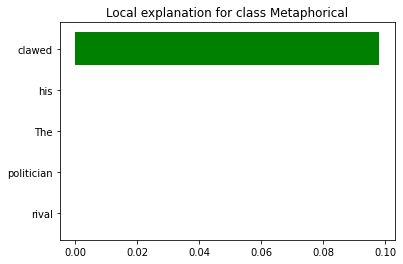

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
#exp.show_in_notebook(text=False)
#exp.save_to_file('/tmp/oi.html')
#exp.show_in_notebook(text=True)

In [ ]:
# BERT Finetuning

In [ ]:
# Some processing before Finetuning

def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Print sentence 0
print('Original: ', X[0])
print('Processed: ', text_preprocessing(X[0]))

Original:   He absorbed the knowledge or beliefs of his tribe .
Processed:  He absorbed the knowledge or beliefs of his tribe .


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased') #BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
# Concatenate train data and test data
all_sentences = df['sentence']

# Encode our concatenated data
encoded_sentences = [bb.tokenizer.encode(sent, add_special_tokens=True) for sent in all_sentences]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_sentences])
print('Max length: ', max_len)

Max length:  22


In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 64

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:   He absorbed the knowledge or beliefs of his tribe .
Token IDs:  [101, 2002, 9063, 1996, 3716, 2030, 9029, 1997, 2010, 5917, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 54.4 µs


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=3):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=10, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla P100-PCIE-16GB


In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=3)
train(bert_classifier, train_dataloader, val_dataloader, epochs=3, evaluation=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   18    |   0.642436   |     -      |     -     |   4.37   
----------------------------------------------------------------------
   1    |    -    |   0.642436   |  0.381587  |   92.71   |   4.51   
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   18    |   0.414300   |     -      |     -     |   3.98   
----------------------------------------------------------------------
   2    |    -    |   0.414300   |  0.267446  |   89.58   |   4.12   
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
-------------------------------------------------------------

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_val)

In [ ]:
preds = probs[:, 1]
y_pred = np.where(preds >= 0.5, 1, 0)

#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_val, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_val, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_val, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_val, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_val, y_pred, average='weighted')))

Confusion Matrix

[[30  4]
 [ 2 29]]

Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91


In [ ]:
def get_predictions(model, data_loader):
  model.eval()
  
  sentence_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["sentence_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      sentence_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sentence_texts, predictions, prediction_probs, real_values

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, y_pred, target_names=['Literal','Metaphorical']))


Classification Report

              precision    recall  f1-score   support

     Literal       0.94      0.88      0.91        34
Metaphorical       0.88      0.94      0.91        31

    accuracy                           0.91        65
   macro avg       0.91      0.91      0.91        65
weighted avg       0.91      0.91      0.91        65



In [ ]:
#import torch
#torch.save(bert_classifier, 'bert_finetuned.pth')

#saved_model = torch.load('bert_finetuned.pth')

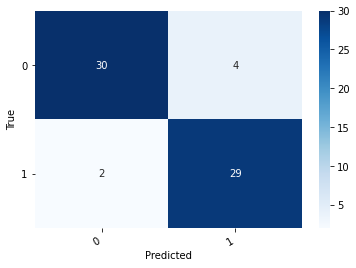

In [ ]:
import seaborn as sns
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');

cm = confusion_matrix(y_val, y_pred)
#df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(cm)

##Predictions on Test Set

In [ ]:
# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(test_data.sentence.astype(str))

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

Tokenizing data...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

# Get predictions from the probabilities
threshold = 0.4
preds = np.where(probs[:, 1] > threshold, 1, 0)

# Number of tweets predicted non-negative
print("Number of sentences predicted non-metaphorical: ", preds.sum())

Number of sentences predicted non-metaphorical:  40


In [ ]:
output = pd.DataFrame({'sentence': test_data.sentence,
                       'correct_label': test_data.label,
                       'prediction': preds})
output.to_csv('mohx_submission.csv', index=False)

In [ ]:
predictions = pd.read_csv("mohx_submission.csv")

In [ ]:
predictions.head()

sentence  correct_label  prediction
0   He marched into the classroom and announced t...              0           1
1           The stars gravitate towards each other .              0           0
2                        A hot soup will revive me .              1           1
3                   He revived this style of opera .              1           1
4   They clawed their way to the top of the mount...              1           1

In [ ]:
predictions.shape

(65, 3)

In [ ]:
test_data.label.value_counts()

1    36
0    29
Name: label, dtype: int64

In [ ]:
final = predictions[(predictions['correct_label'] == predictions['prediction'])]

In [ ]:
final.shape

(59, 3)

In [ ]:
correct_met = predictions[(predictions['correct_label'] == 1) & (predictions['prediction'] ==1)]

In [ ]:
correct_met.shape

(35, 3)

In [ ]:
correct_lit = predictions[(predictions['correct_label'] == 0) & (predictions['prediction'] ==0)]

In [ ]:
correct_lit.shape

(24, 3)

## Save the Model and Import it


In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = 'stockholm/bert_code/mohx_bert/bert_model_save'

# output_dir = './content/xlm-roberta_model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = bert_classifier.module if hasattr(bert_classifier, 'module') else bert_classifier  # Take care of distributed/parallel training
torch.save(model_to_save, 'bert_improved.pt')
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to stockholm/bert_code/mohx_bert/bert_model_save


('stockholm/bert_code/mohx_bert/bert_model_save/tokenizer_config.json',
 'stockholm/bert_code/mohx_bert/bert_model_save/special_tokens_map.json',
 'stockholm/bert_code/mohx_bert/bert_model_save/vocab.txt',
 'stockholm/bert_code/mohx_bert/bert_model_save/added_tokens.json',
 'stockholm/bert_code/mohx_bert/bert_model_save/tokenizer.json')

In [ ]:
import torch
# Load the BERT tokenizer.
print('Loading Bert Base Uncased Tokenizer...')
bert_tokenizer = BertTokenizerFast.from_pretrained(output_dir)
model = torch.load('stockholm/mohx_bert/bert_model_save/bert_improved.pt')

Loading Bert Base Uncased Tokenizer...


In [ ]:
model = model.to(device)

## Create the Model

In [ ]:
# Create the model
model_e = BertForSequenceClassification.from_pretrained("bert-base-uncased", output_attentions=True)
# Load pre-trained weights
#checkpoint = torch.load("saved_weights.pt", map_location="cpu")
# Add them to the model
#model_e.load_state_dict(checkpoint)
model_e = model_e.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#max pooling to generate a fixed sized sentence embedding


#Max Pooling - Take the max value over time for every dimension
def max_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.resize_(token_embeddings.size())
    #input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    token_embeddings[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
    max_over_time = torch.max(token_embeddings, 1)[0]
    return max_over_time

def avg_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.resize_(token_embeddings.size())
    #input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    token_embeddings[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
    avg_over_time = torch.mean(token_embeddings, 1)[0]
    return avg_over_time


#Sentences we want sentence embeddings for
sentences = ['The', 'stars', 'gravitate', 'towards', 'each', 'other.']

#Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
encoded_input = encoded_input.to(device)

#Compute token embeddings
with torch.no_grad():
    model_output = model_e(**encoded_input)

#Perform pooling. In this case, max pooling
sentence_embeddings = max_pooling(model_output, encoded_input['attention_mask'])
#avg_sentence_embeddings = avg_pooling(model_output, encoded_input['attention_mask'])


print("Sentence embeddings:")
print(sentence_embeddings)

Sentence embeddings:
tensor([ 9.8694e-02, -5.2829e-01,  2.9750e-01,  2.1031e-01, -1.0000e+09,
         6.2539e-01], device='cuda:0')


In [ ]:
# numpy implementation of argmax
from numpy import argmax

sentence_embeddings = sentence_embeddings.cpu()

# get argmax
result = argmax(sentence_embeddings)
print('arg max of %s: %d' % (sentence_embeddings, result))

arg max of tensor([ 9.8694e-02, -5.2829e-01,  2.9750e-01,  2.1031e-01, -1.0000e+09,
         6.2539e-01]): 5


In [ ]:
#CLS token of each input represents the sentence embedding


#Sentences we want sentence embeddings for
sentences = ['The', 'stars', 'gravitate', 'towards', 'each', 'other']


#Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
encoded_input = encoded_input.to(device)

#Compute token embeddings
with torch.no_grad():
    model_output = model_e(**encoded_input)
    #model_output = model_output.to(device)
    
sentence_embeddings = model_output[0][:,0] #Take the first token ([CLS]) from each sentence 

print("Sentence embeddings:")
print(sentence_embeddings)

Sentence embeddings:
tensor([-0.7194, -0.5283, -0.3754, -0.6102, -0.6863, -0.7114], device='cuda:0')


In [ ]:
# numpy implementation of argmax
from numpy import argmax

sentence_embeddings = sentence_embeddings.cpu()

# get argmax
result = argmax(sentence_embeddings)
print('arg max of %s: %d' % (sentence_embeddings, result))

arg max of tensor([-0.7194, -0.5283, -0.3754, -0.6102, -0.6863, -0.7114]): 2


##Attention and ArgMax

In [ ]:
# Use a subset for quick experiments
#subset_data = data[:10000]

from sklearn.model_selection import train_test_split as tts

# Split to train, val and test
train, test = tts(df[["sentence", "label"]], random_state=42, test_size=0.1)
train, val = tts(train, random_state=42, test_size=test.shape[0])

In [ ]:
# Construct a BERT tokenizer based on WordPiece
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
# A sanity check of the tokenizer
encoded_instance = bert_tokenizer.batch_encode_plus([train.iloc[0].sentence], padding=True)
print(encoded_instance)

In [ ]:
print("Original text:", df.iloc[0].sentence)
print("BERT BPEs:", bert_tokenizer.convert_ids_to_tokens(encoded_instance["input_ids"][0]))

In [ ]:
# Set max_len to the maximum length of the training data 
max_len = max([len(bert_tokenizer.encode(s)) for s in df.sentence.to_list()])
print("The maximum sentence length in training based on BERT BPEs is", max_len)

In [ ]:
# Tokenize and encode sentences in each set
x_train = bert_tokenizer.batch_encode_plus(
    train.sentence.tolist(),
    max_length = max_len,
    padding=True,
    truncation=True
)
x_val = bert_tokenizer.batch_encode_plus(
    val.sentence.tolist(),
    max_length = max_len,
    padding=True,
    truncation=True
)
x_test = bert_tokenizer.batch_encode_plus(
    test.sentence.tolist(),
    max_length = max_len,
    padding=True,
    truncation=True
)

In [ ]:
# Convert lists to tensors in order to feed them to our PyTorch model
train_seq = torch.tensor(x_train['input_ids'])
train_mask = torch.tensor(x_train['attention_mask'])
train_y = torch.tensor(train.label.tolist())

val_seq = torch.tensor(x_val['input_ids'])
val_mask = torch.tensor(x_val['attention_mask'])
val_y = torch.tensor(val.label.tolist())

test_seq = torch.tensor(x_test['input_ids'])
test_mask = torch.tensor(x_test['attention_mask'])
test_y = torch.tensor(test.label.tolist())

In [ ]:
batch_size = 32

# Create a dataloader for each set

# TensorDataset: Creates a PyTorch dataset object to load data from
train_data = TensorDataset(train_seq, train_mask, train_y)
# RandomSampler: specify the sequence of indices/keys used in data loading
train_sampler = RandomSampler(train_data)
# DataLoader: a Python iterable over a dataset
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

test_data = TensorDataset(test_seq, test_mask, test_y)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=1)

In [ ]:
# Get attention heatmaps
import matplotlib
from IPython.core.display import display, HTML
def colorize(words, color_array):
    cmap=matplotlib.cm.Reds
    template = '<span class="barcode"; style="color: black; background-color: {}">{}</span>'
    colored_string = ''
    for word, color in zip(words, color_array):
        color = matplotlib.colors.rgb2hex(cmap(color)[:3])
        colored_string += template.format(color, '&nbsp' + word + '&nbsp')
    return colored_string

In [ ]:
from scipy.special import softmax

In [ ]:
# Predict for the test set and save the results
model_e.eval()
test_predictions = []
test_targets = []
test_attentions = []
test_inputs = []

for batch in test_dataloader:
  batch = [t.to(device) for t in batch]
  sent_id, mask, labels = batch
  # Get gold labels
  test_targets.extend(labels.detach().cpu().numpy())
  # Get input words
  test_inputs.append(bert_tokenizer.convert_ids_to_tokens(sent_id.detach().cpu().numpy()[0]))
  with torch.no_grad():
    # Get predictions
    outputs = model_e(sent_id, attention_mask=mask)
    # Apply softmax to the outputs
    output_probs = softmax(outputs.logits.detach().cpu().numpy(), axis=1)
    # Get the with the highest probability as the predicted label
    test_predictions.extend(np.argmax(output_probs, axis=1))
    # Get attention weights
    # Attention weights from all layers are returned in a tuple
    # The weights from each layer are in a tensor with shape (batch_size, attention_heads, max_len, max_len)
    test_attentions.append(outputs.attentions)

In [ ]:
# Max Pooling for all tokens in sentences and argmax

# Select some sentences randomly
sent_index = [1, 2, 3]

for s in sent_index:
  print("*" * 100)
  # For each layer...
  for l in range(12):
    print("\nLayer", l+1)
    attention = np.squeeze(test_attentions[s][l].detach().cpu().numpy(), axis=0)
    # and for each head
    for h, head in enumerate(attention):
      print("Head", h+1)
      # Get the sentence's words
      tokens = test_inputs[s]
      encoded_tokens = bert_tokenizer(tokens, padding=True, truncation=True, max_length=128, return_tensors='pt')
      encoded_tokens = encoded_tokens.to(device)
      with torch.no_grad():
        model_output1 = model_e(**encoded_tokens)
        tokens_embeddings = max_pooling(model_output1, encoded_tokens['attention_mask'])
        tokens_embeddings = tokens_embeddings.cpu()
        # Get the attention for the cls token
        cls_attentions = head[0]
        display(HTML(colorize(tokens, cls_attentions)))
        print("Tokens embeddings:")
        print(tokens_embeddings)
        arg = argmax(tokens_embeddings)
        print('arg max of %s: %d' % (tokens_embeddings, arg))

In [ ]:
# Max Pooling for all tokens in sentences and argmax

# Select some sentences randomly
sent_index = [4, 5, 6]

for s in sent_index:
  print("*" * 100)
  # Get the sentence's words
  tokens = test_inputs[s]
  # For each layer...
  for l in range(12):
    print("\nLayer", l+1)
    attention = np.squeeze(test_attentions[s][l].detach().cpu().numpy(), axis=0)
    # and for each head
    for h, head in enumerate(attention):
      print("Head", h+1)
      # Get the attention for the cls token
      encoded_tokens = bert_tokenizer(tokens, truncation=True, padding=True, max_length=128, return_tensors='pt')
      encoded_tokens = encoded_tokens.to(device)
      with torch.no_grad():
        model_output1 = model_e(**encoded_tokens)
        tokens_embeddings = max_pooling(model_output1, encoded_tokens['attention_mask'])
        tokens_embeddings = tokens_embeddings.cpu()
        cls_attentions = head[0]
        display(HTML(colorize(tokens, cls_attentions)))
        print("Tokens embeddings:")
        print(tokens_embeddings)
        arg = argmax(tokens_embeddings)
        print('arg max of %s: %d' % (tokens_embeddings, arg))